### Imbalanced Dataset

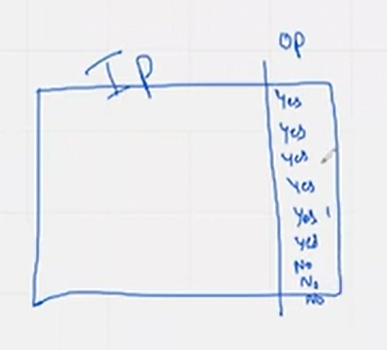

### SMOTE(Synthetic minority over sampling technique)

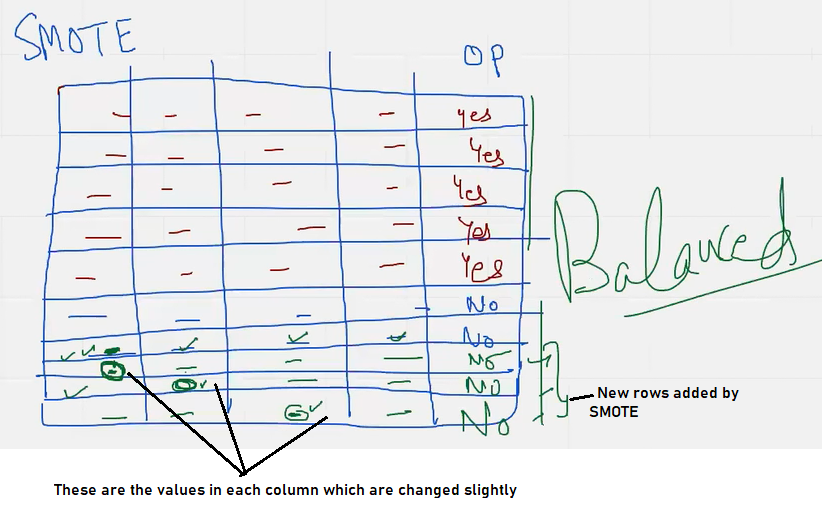

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('pima_indian_diabetes.csv',header=0,names=range(0,8))
ds

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [3]:
df=pd.DataFrame(data=ds)

In [4]:
df

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [5]:
dfx=df.iloc[:,0:7]
dfx

,0,1,2,3,4,5,6
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30
1,126,60,0,0,30.1,0.349,47


In [6]:
dfy=df.iloc[:,7]
dfy

1     0
8     1
1     0
0     1
5     0
     ..
10    0
2     0
5     0
1     1
1     0
Name: 7, Length: 767, dtype: int64

In [7]:
dfy.value_counts()

0    500
1    267
Name: 7, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

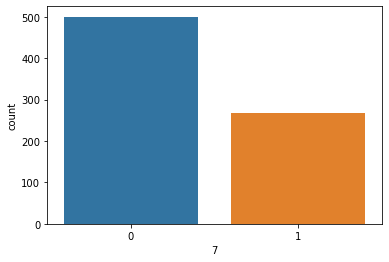

In [8]:
sns.countplot(dfy)

<AxesSubplot:xlabel='7', ylabel='count'>

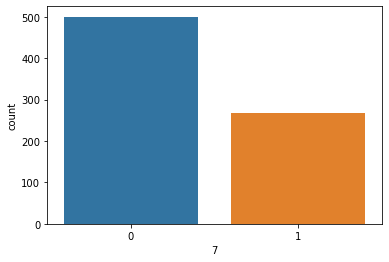

In [9]:
sns.countplot(df[7])

# Applying SMOTE

In [10]:
import sklearn
sklearn.__version__

'1.0.2'

In [11]:
import numpy
numpy.__version__

'1.20.1'

In [12]:
#!pip install -U imbalanced-learn


In [13]:
#pip install --user imblearn

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
smt=SMOTE()  #initiating object from class
balancedx,balancedy=smt.fit_resample(dfx,dfy)   #Note that train_test_split is not yet applied.

In [16]:
balancedx.value_counts()   #Meaningless

0    1   2   3    4          5         6 
0    48  20  0    24.700000  0.140000  22    1
136  82  0   0    0.000000   0.640000  69    1
135  68  42  250  42.300000  0.365000  24    1
     70  0   0    30.772624  1.063078  22    1
     83  34  129  28.313753  0.280263  42    1
                                            ..
109  60  27  0    25.000000  0.206000  27    1
     62  41  129  35.800000  0.514000  25    1
     64  44  99   34.800000  0.905000  26    1
     70  41  107  30.836948  0.752796  28    1
199  76  43  0    42.900000  1.394000  22    1
Length: 1000, dtype: int64

In [17]:
balancedy.value_counts()

0    500
1    500
Name: 7, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

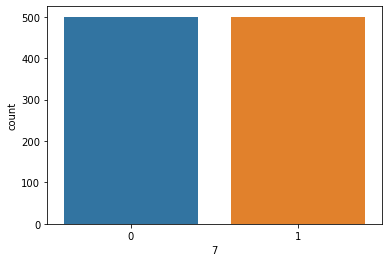

In [18]:
sns.countplot(balancedy)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_x,test_x,train_y,test_y=train_test_split(balancedx,balancedy,test_size=0.30,random_state=45)

In [21]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
print(lg.score(train_x,train_y))

pred=lg.predict(test_x)

               


0.7428571428571429


In [22]:
pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], d

In [23]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(test_y,pred),2))

0.7


In [24]:
train_x.shape

(700, 7)

In [25]:
train_y.shape

(700,)

In [26]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
print(lg.score(train_x,train_y)) #How well the data has fit into the model

pred=lg.predict(test_x)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(round(accuracy_score(test_y,pred)))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.7428571428571429
1
[[ 99  43]
 [ 46 112]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       142
           1       0.72      0.71      0.72       158

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



In [27]:
dfiris=pd.read_csv('iris.csv')
dfiris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
dfiris['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

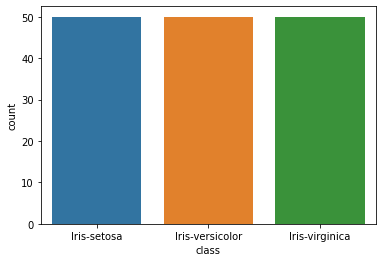

In [29]:
sns.countplot(dfiris['class']) #No need to apply SMOTE since it is a balanced dataset.

In [30]:
winedf=pd.read_csv('winequality-red.csv')
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
winedf['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

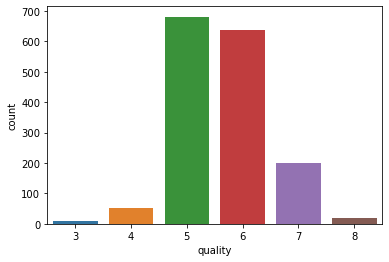

In [32]:
sns.countplot(winedf['quality'])

In [33]:
x=winedf.iloc[:,0:-1]
y=winedf.iloc[:,-1]

#'quality' is the target variable

In [34]:
y.shape

(1599,)

In [35]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
xtrainw,ytrainw=sm.fit_resample(x,y)

In [36]:
ytrainw.shape

(4086,)

In [37]:
ytrainw.value_counts()

4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

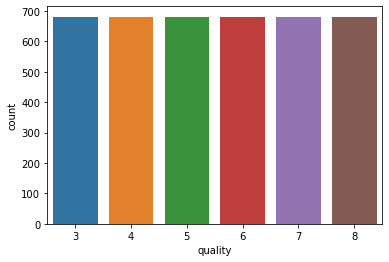

In [38]:
sns.countplot(ytrainw)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

xtrain,xtest,ytrain,ytest=train_test_split(xtrainw,ytrainw,test_size=0.30,random_state=45)

dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

prd=dtc.predict(xtest)
print('Accuracy:',accuracy_score(ytest,prd))
print(confusion_matrix(ytest,prd))

Accuracy: 0.8001631321370309
[[215   2   2   1   0   0]
 [  3 170   8  10   5   0]
 [  4  20 132  36   7   0]
 [  7  11  25 120  40   4]
 [  2   2   7  21 158  10]
 [  0   0   2   5  11 186]]
